In [11]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [182]:
import pandas as pd 
X_train = pd.read_csv('bi_5_X.csv', delimiter = ',')
Y_train = pd.read_csv('bi_5_Y.csv', delimiter = ',')

In [183]:
X_train.shape, Y_train.shape

((547192, 49), (547192, 2))

In [184]:
X_train = X_train.iloc[:,1:]
Y_train = Y_train.iloc[:,1]
Y_train = pd.factorize(Y_train)[0]

In [185]:
X_train = StandardScaler().fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X_train , Y_train, test_size=0.2, random_state=42)

In [187]:
x_train.shape, y_train.shape

((437753, 48), (437753,))

In [175]:
model = Sequential()
model.add(Dense(30, input_shape=[48], activation = 'linear'))
model.add(Dense(20, activation = 'linear'))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 30)                1470      
_________________________________________________________________
dense_70 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_71 (Dense)             (None, 11)                231       
Total params: 2,321
Trainable params: 2,321
Non-trainable params: 0
_________________________________________________________________


In [188]:
model = Sequential()
model.add(Dense(30, input_shape=[48], activation = 'linear'))
model.add(Dense(10, activation = 'linear'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 30)                1470      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 22        
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
_________________________________________________________________


In [54]:
model = Sequential()
model.add(Dense(90, input_shape=[115], activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 90)                10440     
_________________________________________________________________
dense_18 (Dense)             (None, 50)                4550      
_________________________________________________________________
dense_19 (Dense)             (None, 11)                561       
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 24        
Total params: 15,575
Trainable params: 15,575
Non-trainable params: 0
_________________________________________________________________


In [115]:
model = Sequential()
model.add(Dense(90, input_shape=[115], activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 90)                10440     
_________________________________________________________________
dense_45 (Dense)             (None, 50)                4550      
_________________________________________________________________
dense_46 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_47 (Dense)             (None, 11)                341       
Total params: 16,861
Trainable params: 16,861
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.fit(x_train, y_train, epochs=1) #batch_size의 default: 32

437753/437753 [==============================] - 44s 101us/sample - loss: 0.0075 - acc: 0.9985


In [190]:
model.evaluate(x_test, y_test)

109439/109439 [==============================] - ETA: 0s - loss: 0.0035 - acc: 0.999 - 9s 82us/sample - loss: 0.0036 - acc: 0.9991


[0.003554638632645341, 0.9991045]

In [191]:
y_pred = model.predict(x_test)
y_pred2=[]
for i in y_pred:
    y_pred2.append(np.argmax(i))

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59914
           1       1.00      1.00      1.00     49525

   micro avg       1.00      1.00      1.00    109439
   macro avg       1.00      1.00      1.00    109439
weighted avg       1.00      1.00      1.00    109439



In [194]:
print(confusion_matrix(y_test, y_pred2))

[[59909     5]
 [   93 49432]]


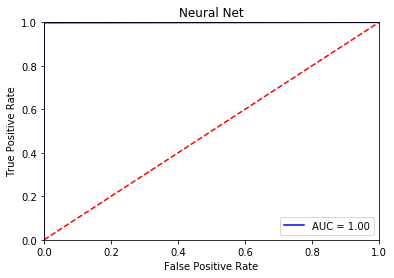

In [192]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Neural Net')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

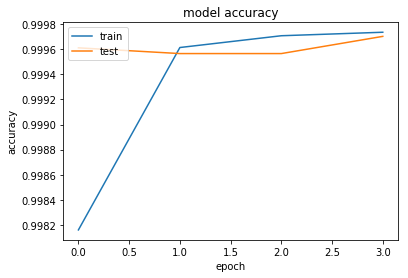

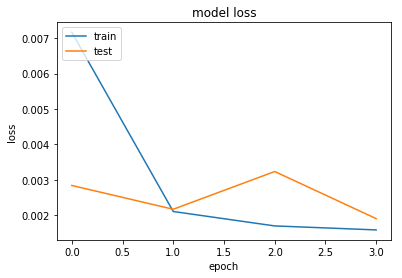

In [162]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [162]:
Y_train

array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)

In [148]:
y_pred[1]

array([1.6557424e-05, 9.9998343e-01], dtype=float32)

In [149]:
np.argmax(y_pred)

0